## **Linear Regression From Scratch**

The formula for simple linear regression, which models the relationship between a dependent variable (y) and a single independent variable (x), is:

**y = mx + b**

Where:

* **y** is the predicted value of the dependent variable.
* **x** is the independent variable.
* **m** is the slope of the line, representing the change in y for a unit change in x.
* **b** is the y-intercept, representing the value of y when x is 0.


In [ ]:
# importing liberaries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

**3. Gradient Descent Algorithm:**

The goal is to find the values of the parameters (m and b for simple linear regression, or b₀, b₁, ..., bₚ for multiple linear regression) that minimize the MSE. Gradient descent achieves this by iteratively adjusting the parameters in the direction of the negative gradient of the MSE.

**4. Calculating the Gradients:**

To update the parameters, we need to calculate the partial derivatives of the MSE with respect to each parameter.

* **Simple Linear Regression:**

    * ∂(MSE)/∂m = (-2/n) * Σ(xᵢ * (yᵢ - ŷᵢ))
    * ∂(MSE)/∂b = (-2/n) * Σ(yᵢ - ŷᵢ)



**5. Updating the Parameters:**

The parameters are updated using the following formulas:

* **Simple Linear Regression:**

    * m := m - α * ∂(MSE)/∂m
    * b := b - α * ∂(MSE)/∂b


# linear regression algorithum 

In [3]:
class LinearRegression:
    def __init__(self , learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y): 
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.num_iterations):  

            # initial y prediction
            y_pred = np.dot(X, self.weights) + self.bias

            # calulate derivatives for gradient descent
            weight_derivatives = -(2/n_samples) * np.dot(X.T, (y - y_pred))
            bias_derivative = -(2/n_samples) * np.sum(y - y_pred)

            # updating weights and bias continuously
            self.weights -= self.learning_rate * weight_derivatives
            self.bias -= self.learning_rate * bias_derivative


    def predict(self, X): 
        return np.dot(X, self.weights) + self.bias  

**Mean Squared Error (MSE)**

The formula for Mean Squared Error (MSE) is:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

Where:

* $n$ = number of data points
* $Y_i$ = actual (observed) value of the dependent variable for the i-th data point
* $\hat{Y}_i$ = predicted value of the dependent variable for the i-th data point
* $\sum_{i=1}^{n}$ = summation from i=1 to n

Mean Squared Error: 305.77


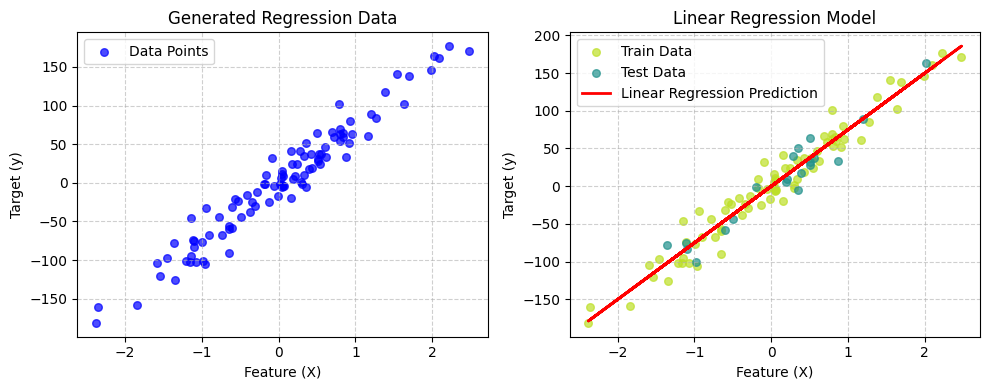

In [13]:
# Generate data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First subplot: Original data scatter plot
axes[0].scatter(X[:, 0], y, color="b", marker="o", s=30, alpha=0.7, label="Data Points")
axes[0].set_title("Generated Regression Data")
axes[0].set_xlabel("Feature (X)")
axes[0].set_ylabel("Target (y)")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Train the model
reg = LinearRegression(learning_rate=0.01, num_iterations=1500)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

# Calculate MSE
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

mse_value = mse(y_test, predictions)
print(f"Mean Squared Error: {mse_value:.2f}")

# Second subplot: Prediction line and scatter plot
y_pred_line = reg.predict(X)
cmap = plt.get_cmap("viridis")
axes[1].scatter(X_train, y_train, color=cmap(0.9), s=30, alpha=0.7, label="Train Data")
axes[1].scatter(X_test, y_test, color=cmap(0.5), s=30, alpha=0.7, label="Test Data")
axes[1].plot(X, y_pred_line, color="red", linewidth=2, label="Linear Regression Prediction")
axes[1].set_title("Linear Regression Model")
axes[1].set_xlabel("Feature (X)")
axes[1].set_ylabel("Target (y)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Improves subplot spacing
plt.show()